In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [8]:
raw_data = pd.read_csv(r'C:\Users\Sina\Desktop\CODES\Sources\2(LOGISTIC REGRESSION)\Bank_data_training_1501.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,359,4.946549,0.0,1.0,0.138257,0.0,727.243330,yes
1,382,4.657465,0.0,0.0,-0.048268,0.0,709.740391,yes
2,441,0.901088,0.0,0.0,2.892969,0.0,444.136568,yes
3,322,4.131972,0.0,0.0,-0.011474,0.0,20.703676,no
4,260,1.453000,0.0,0.0,0.000000,0.0,463.000000,yes
...,...,...,...,...,...,...,...,...
1495,87,0.418250,1.0,0.0,0.887317,0.0,300.052310,yes
1496,163,4.978982,0.0,1.0,0.050706,0.0,394.609480,no
1497,542,5.174573,0.0,0.0,0.168752,1.0,537.561355,no
1498,197,4.773113,0.0,1.0,0.041315,0.0,436.821801,no


In [10]:
data = raw_data.copy()
data = data.drop(['Unnamed: 0'], axis=1)
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,4.946549,0.0,1.0,0.138257,0.0,727.243330,1
1,4.657465,0.0,0.0,-0.048268,0.0,709.740391,1
2,0.901088,0.0,0.0,2.892969,0.0,444.136568,1
3,4.131972,0.0,0.0,-0.011474,0.0,20.703676,0
4,1.453000,0.0,0.0,0.000000,0.0,463.000000,1
...,...,...,...,...,...,...,...
1495,0.418250,1.0,0.0,0.887317,0.0,300.052310,1
1496,4.978982,0.0,1.0,0.050706,0.0,394.609480,0
1497,5.174573,0.0,0.0,0.168752,1.0,537.561355,0
1498,4.773113,0.0,1.0,0.041315,0.0,436.821801,0


In [11]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()
# Removes the index column thata comes with the data
data = data.drop(['Unnamed: 0'], axis = 1)
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,4.946549,0.0,1.0,0.138257,0.0,727.243330,1
1,4.657465,0.0,0.0,-0.048268,0.0,709.740391,1
2,0.901088,0.0,0.0,2.892969,0.0,444.136568,1
3,4.131972,0.0,0.0,-0.011474,0.0,20.703676,0
4,1.453000,0.0,0.0,0.000000,0.0,463.000000,1
...,...,...,...,...,...,...,...
1495,0.418250,1.0,0.0,0.887317,0.0,300.052310,1
1496,4.978982,0.0,1.0,0.050706,0.0,394.609480,0
1497,5.174573,0.0,0.0,0.168752,1.0,537.561355,0
1498,4.773113,0.0,1.0,0.041315,0.0,436.821801,0


In [12]:
y = data['y']
x1 = data['duration']

In [13]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.544705
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1498
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Oct 2025   Pseudo R-squ.:                  0.2140
Time:                        16:55:16   Log-Likelihood:                -817.06
converged:                       True   LL-Null:                       -1039.5
Covariance Type:            nonrobust   LLR p-value:                 9.401e-99
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7260      0.112    -15.366      0.000      -1.946      -1.506
duration       0.0051      0.000     15.740      0.000       0.004       0.006
==============================================================================
"""

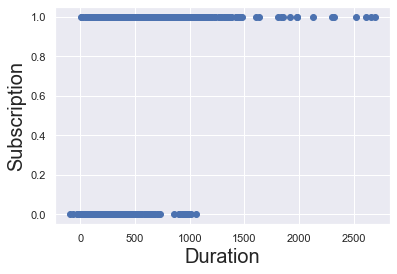

In [14]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [15]:
estimators=['interest_rate','credit','march','previous','duration']

X1_all = data[estimators]
y = data['y']

In [16]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.382565
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.448      
Date:               2025-10-15 17:01 AIC:              1159.6956  
No. Observations:   1500             BIC:              1191.5749  
Df Model:           5                Log-Likelihood:   -573.85    
Df Residuals:       1494             LL-Null:          -1039.5    
Converged:          1.0000           LLR p-value:      4.4839e-199
No. Iterations:     7.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              0.0913   0.1612   0.5664 0.5711 -0.2246  0.4072
interest_rate     -0.8508   0.0496 -17.1686 0.0000 -0.9479 -0.7536
credit             0.6285   0.4084   1.5389 0.1238 -0.1720  1.4290
march             -0.7610   0.1681  -4.5269 0.0000 -1.0904 -0.4315
previous           0.1266   0.2196   0.5767 0.5641 -0.3037  0.5569
duration           0.0067   0.0004  16.0315 0.0000  0.0059  0.0075
==================================================================

"""

In [17]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [18]:
confusion_matrix(X_all,y,results_logit)

(array([[618., 145.],
        [101., 636.]]),
 0.836)

## Test the model

### Load new data

In [20]:
# We have to load data our model has never seen before.
raw_data2 = pd.read_csv(r'C:\Users\Sina\Desktop\CODES\Sources\2(LOGISTIC REGRESSION)\Bank_data_testing.csv')
data_test = raw_data2.copy()
# Removes the index column thata comes with the data
data_test = data_test.drop(['Unnamed: 0'], axis = 1)

In [21]:
# Coverting the outcome variable into 1s and 0s again. 
data_test['y'] = data_test['y'].map({'yes':1, 'no':0})
data_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


In [22]:
y_test = data_test['y']
# We already declared a list called 'estimators' that holds all relevant estimators for our model. 
X1_test = data_test[estimators]
X_test = sm.add_constant(X1_test)

In [23]:
confusion_matrix(X_test, y_test, results_logit)

(array([[94., 17.],
        [12., 99.]]),
 0.8693693693693694)